# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

Импотрируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

Загрузим предоставленные данные.

In [2]:
df = pd.read_csv('telecom_users.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

Посмотрим на небольшой кусочек предоставленных данных.

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


Посмотрим на наличие пропущенных значений.

<AxesSubplot:>

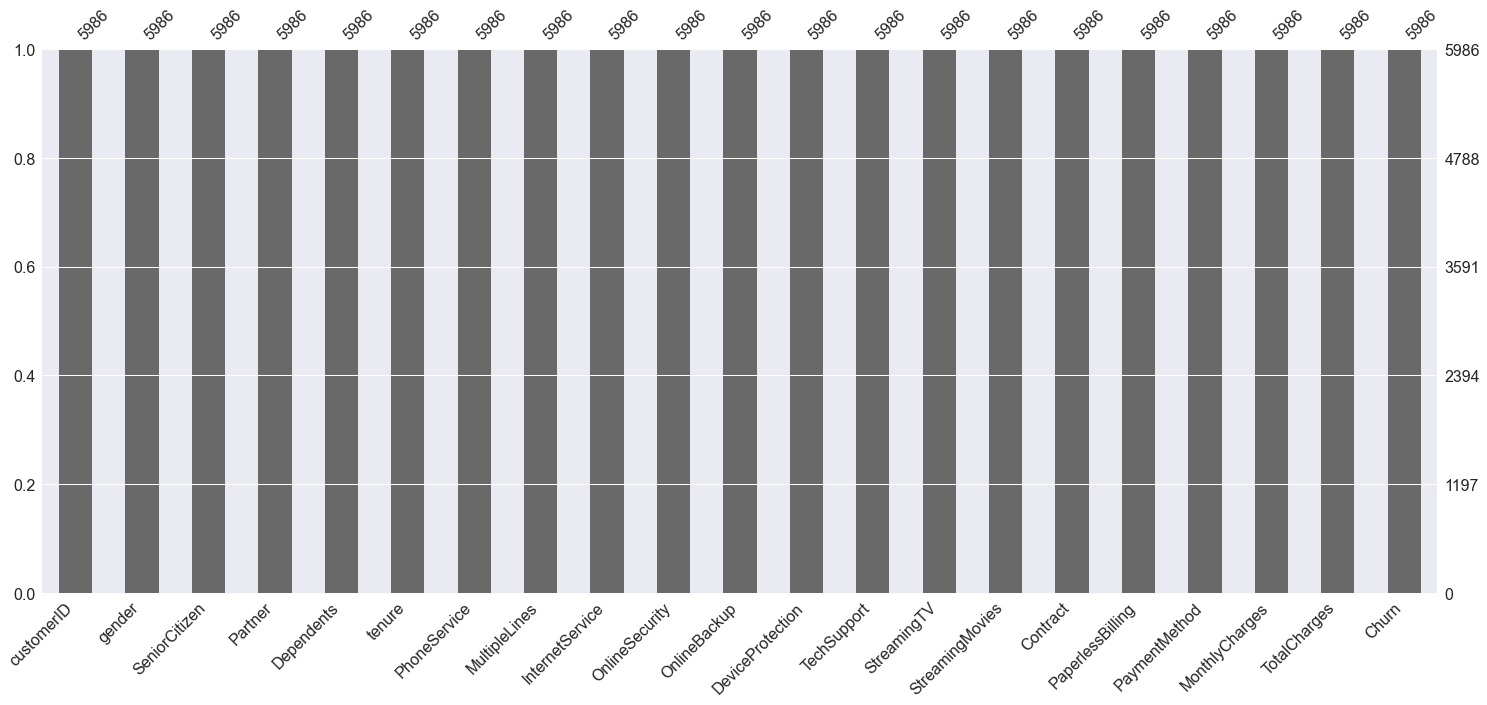

In [16]:
msno.bar(df)

Пропущенных значений нет.

Изучим каждую метрику подробнее, а так же сделаем гистограмму распределения для числовых метрик.

In [53]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [64]:
df.describe(include=[np.number])

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


In [65]:
df.describe(include=[np.object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5611,2
top,7010-BRBUU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,10,4399


Переводим столбцы с естественного языка, в числовой, чтобы мы могли посмотреть на корреляцию фичей с целевой переменной.

In [3]:
df1 = df.drop('customerID', axis=1)
columns = df1.select_dtypes(include=['object']).columns

df[columns] = df1.select_dtypes(include=['object']).astype('category')
cat_columns = df.select_dtypes(include=['category']).columns

df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,1,0,1,1,72,1,2,2,1,...,1,1,1,1,2,0,1,24.10,1066,0
1,9688-YGXVR,0,0,0,0,44,1,0,1,0,...,2,0,2,0,0,1,1,88.15,2901,0
2,9286-DOJGF,0,1,1,0,38,1,2,1,0,...,0,0,0,0,0,1,0,74.95,2126,1
3,6994-KERXL,1,0,0,0,4,1,0,0,0,...,0,0,0,2,0,1,2,55.90,1733,0
4,2181-UAESM,1,0,0,0,2,1,0,0,2,...,2,0,0,0,0,0,2,53.45,308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,1,0,1,0,1,1,0,1,2,...,0,0,2,2,0,1,2,95.00,5540,1
5982,5982-PSMKW,0,0,1,1,23,1,2,0,2,...,2,2,2,2,2,1,1,91.10,1561,0
5983,8044-BGWPI,1,0,1,1,12,1,0,2,1,...,1,1,1,1,0,1,2,21.15,2290,0
5984,7450-NWRTR,1,1,0,0,12,1,2,1,0,...,2,0,2,2,0,1,2,99.45,322,1


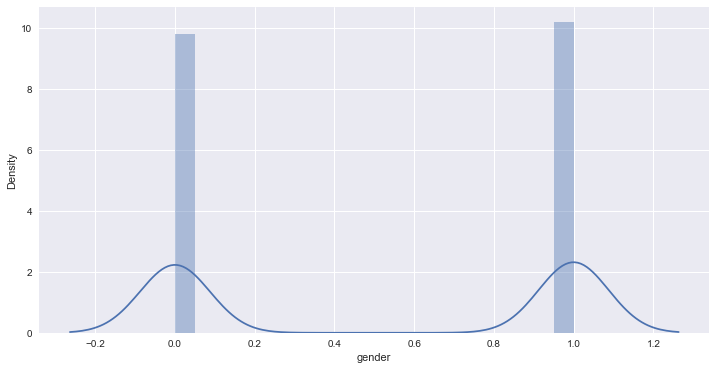

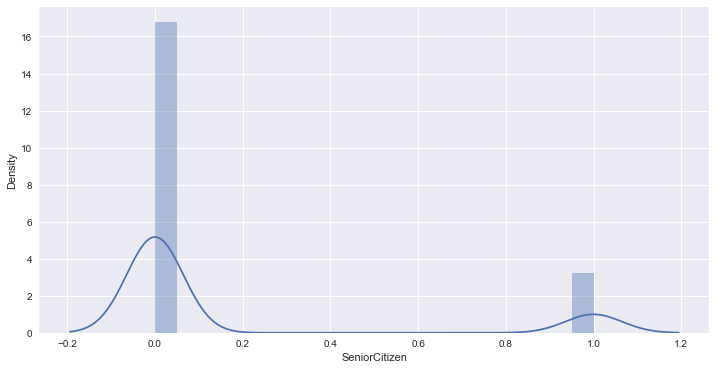

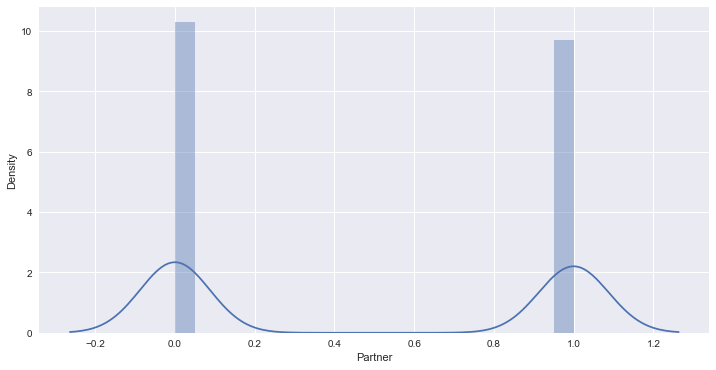

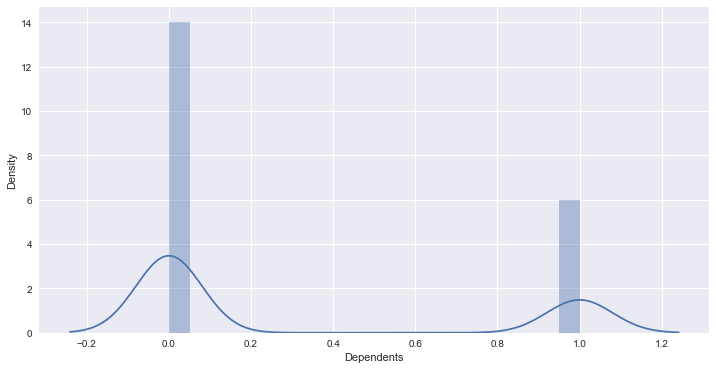

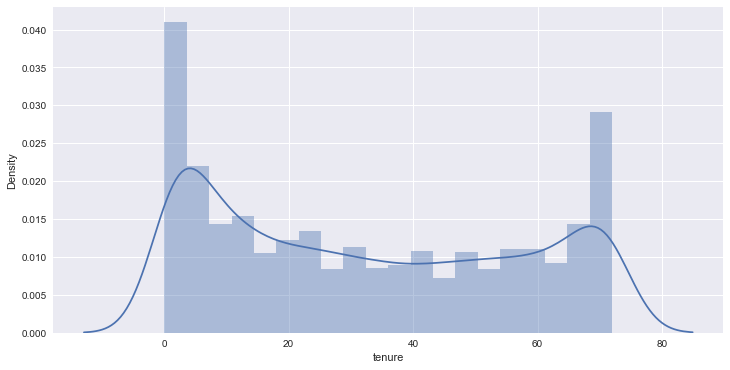

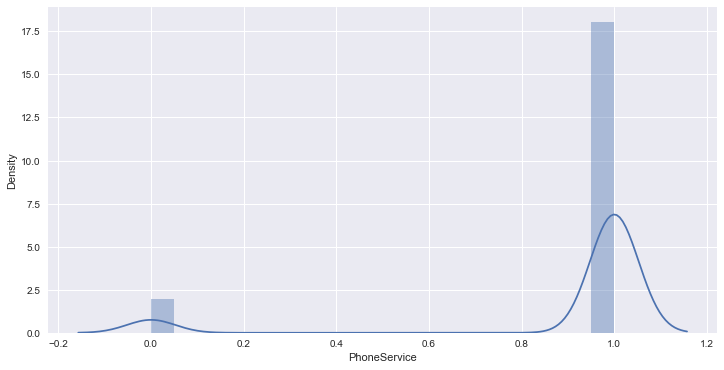

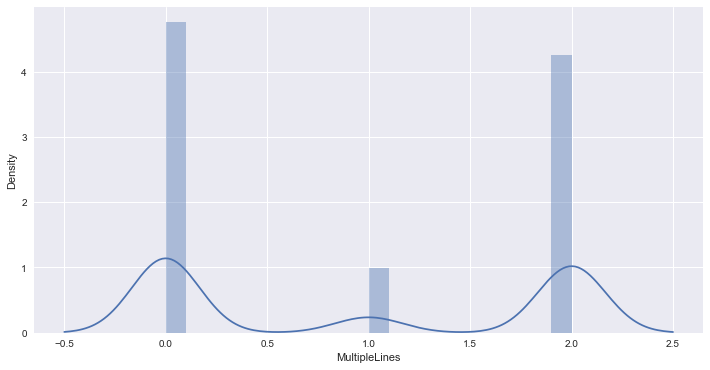

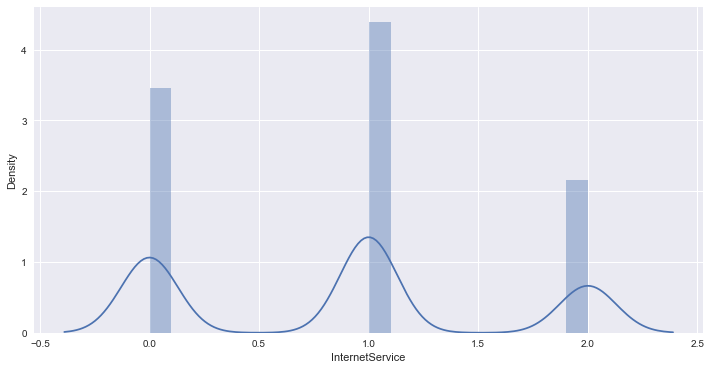

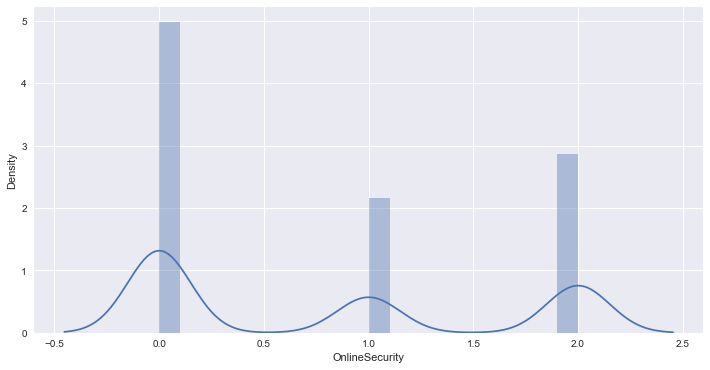

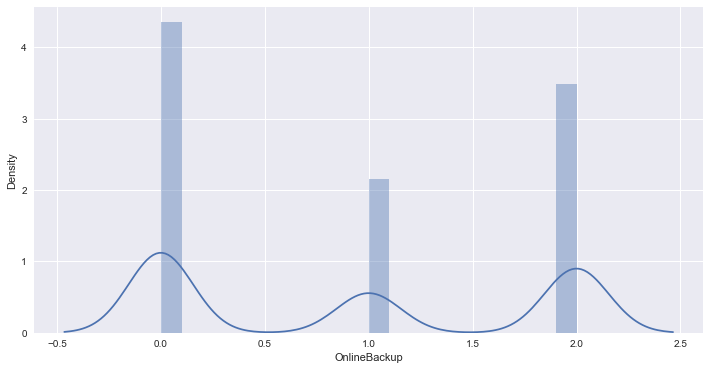

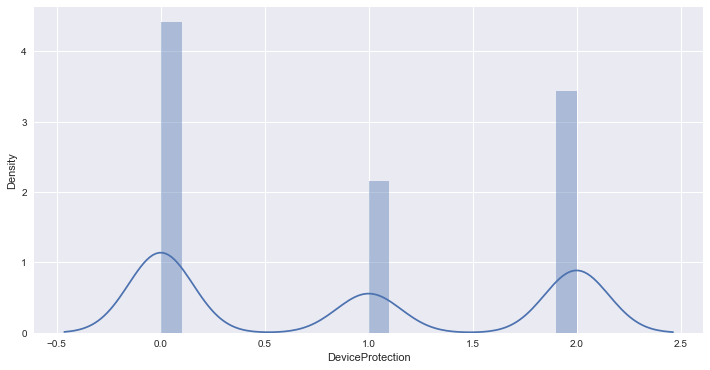

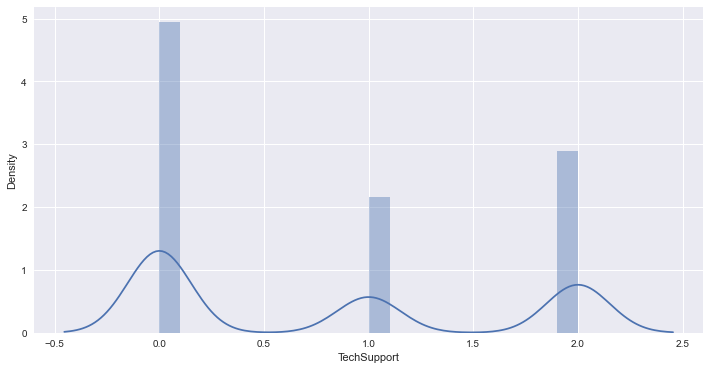

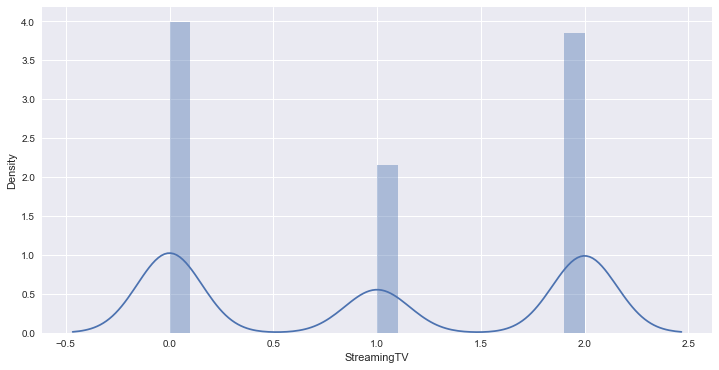

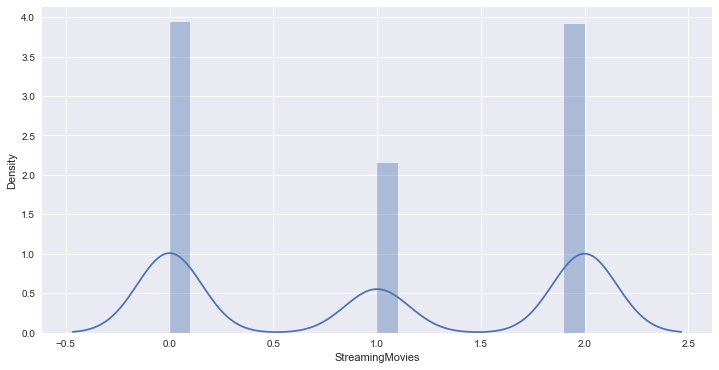

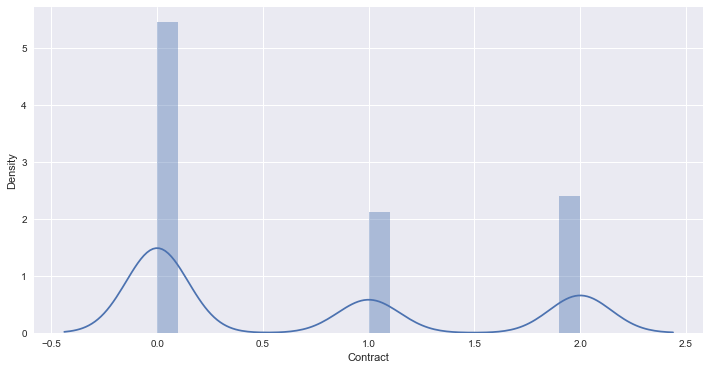

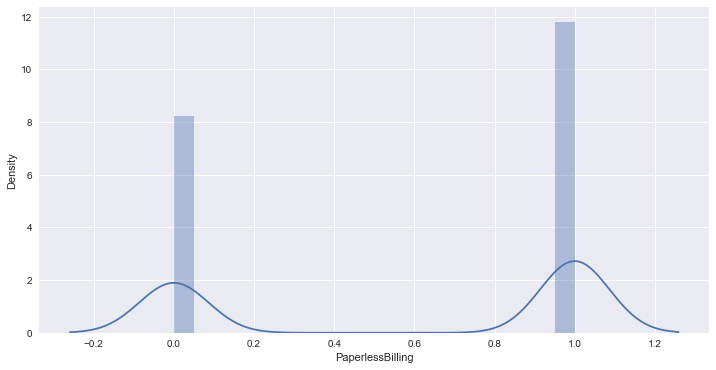

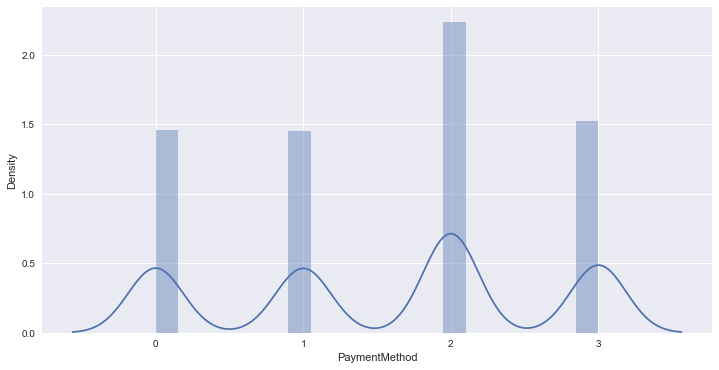

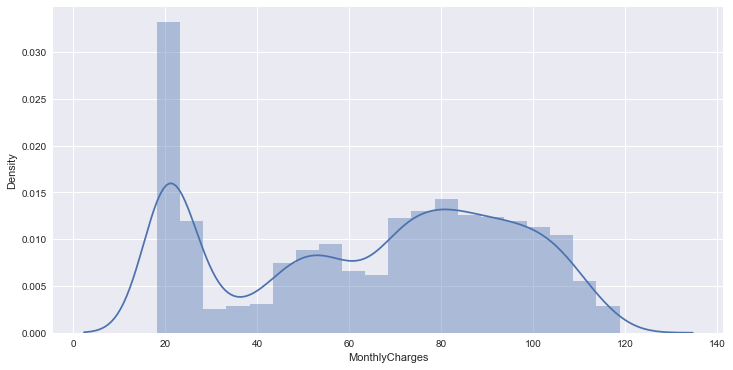

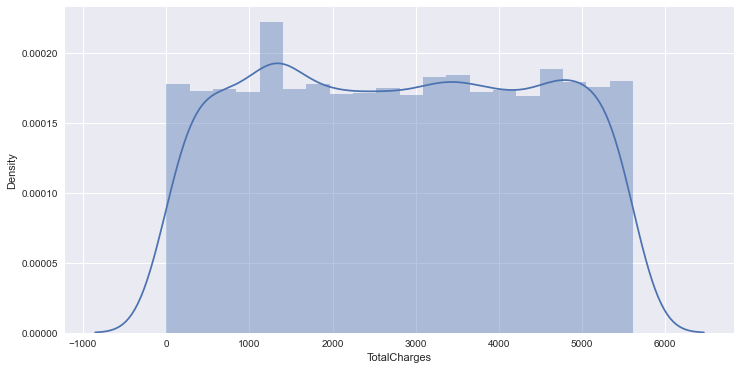

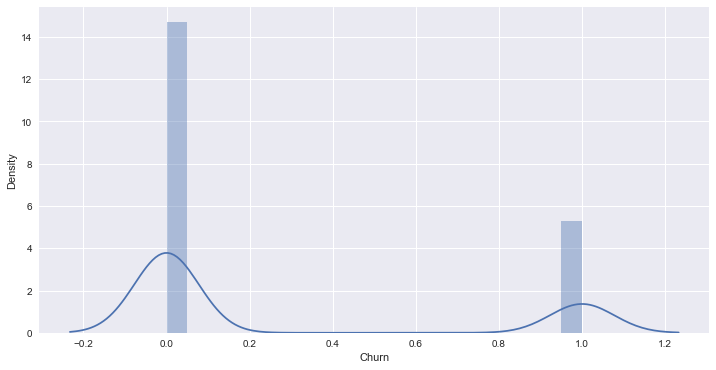

In [18]:
# С помощью цикла проходимся по числовым фичам и рисуем их распределение на гистрограмме
df1 = df.drop('customerID', axis=1)

for i in df1.columns:
    data = df[i]
    plt.figure(figsize=(12, 6))
    sns.distplot(data, bins=20)

plt.show()

# 2. Исследование зависимостей и формулирование гипотез

Блок исследования зависимостей и формулирования гипотез для понимания наиболее важных фичей для построения модели.

Сделаем корреляционную матрицу, чтобы увидеть как данные взаимодействуют между собой.

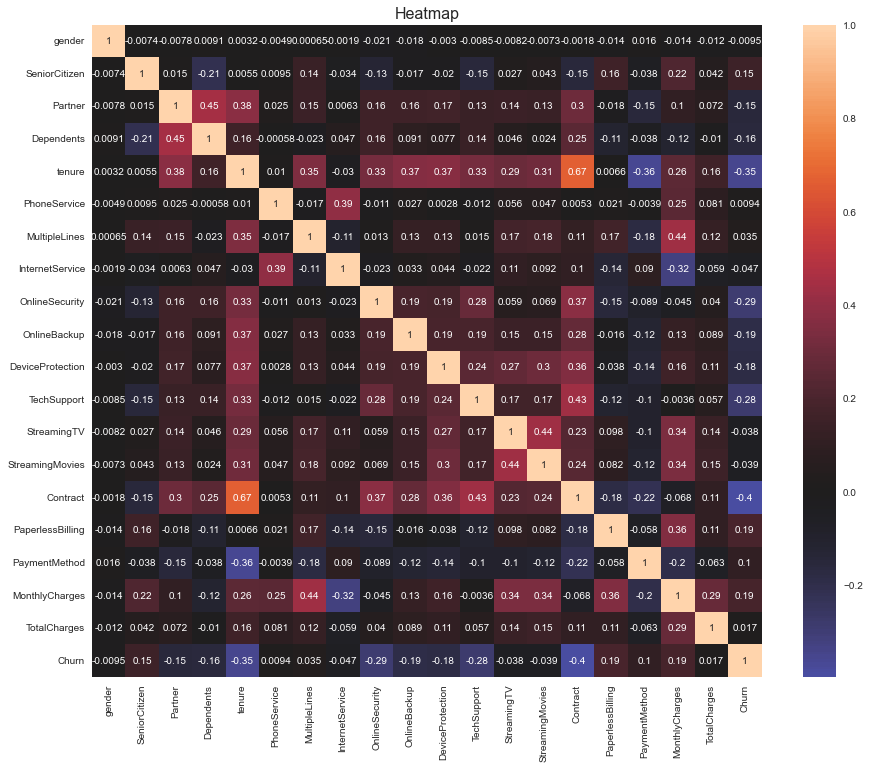

In [21]:
research_list = []
for column in df1.columns:
    research_list.append(column)
    
df_corr = df1[research_list].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(df_corr, center=0, annot=True)
plt.title('Heatmap', fontsize=16)

plt.show()

<h3>Формирования гипотез:</h3>

Внимательно изучив корреляционную матрицу, мы можем сказать о том, что:

    * Признаки "MonthlyCharges", "PaperlessBilling", "SeniorCitizen", будут включены в общую выборку, поскольку имеют самую высокую положительную корреляцию. И мы можем предположить, что данные столбцы намного сильнее положительно влияют на целевую переменную, в отличии от других.
    
    * Признаки "tenure", "OnlineSecurity", "TechSupport", "Contract", "OnlineBackup", "DeviceProtection", будут так же включены в конечную выборку, поскольку имеют самую высокую отрицательную корреляцию. И мы можем предположить, что данные столбцы намного сильнее отрицательно влияют на целевую переменную, в отличии от других.
    
    * Остальные признаки в конечную выборку не будут включены, т.к имеют достаточно слабую корреляцию с целевой переменной и меньше всего влияют на ее значение.

# 3. Построение моделей для прогнозирования оттока

В первую очередь мы подготовим данные на основе гипотез.

In [22]:
X = df[['MonthlyCharges', 'PaperlessBilling', 'SeniorCitizen', 'tenure', 'OnlineSecurity', 'TechSupport', 'Contract', 'OnlineBackup', 
        'DeviceProtection']].values
Y = df['Churn'].values

Разделим данные на тренировочные и тестовые.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=17)

Далее будем обучать модели классификации из библиотеки sklearn:

<h4>Метод ближайших соседей</h4>

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn_model = knn.fit(X_train, Y_train)
knn_pred = knn_model.predict_proba(X_test)

Использую метод ближайших соседей по той причине, что это классический метод классификации из 'коробки' и он так же может показывать хорошие результаты на небольших датасетах.

<h4>Классификатор дерева решений</h4>

In [25]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5, random_state=17)
dtc_model = dtc.fit(X_train, Y_train)
dtc_pred = dtc_model.predict_proba(X_test)

Дерево решений одно из самых успеших методов классификации, по этой причине, было принято решение добавить его в список методов для данной задачи.

<h4>Логистическая регрессия</h4>

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=17)
lr_model = lr.fit(X_train, Y_train)
lr_pred = lr_model.predict_proba(X_test)

Логистическая регрессия, так же как и Линейная регрессия, имеют очень хороший алгоритм работы и предсказания, по этой причине он был включен в список методов.

<h4>Случайное дерево решений</h4>

In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=7, n_estimators=150, random_state=17)
rfc_model = rfc.fit(X_train, Y_train)
rfc_pred = rfc_model.predict_proba(X_test)

Методы ансамблирования, очень часто используются в работе и очень много проектов, где они использовались, по причине хороших показателей, так же был использован метод случайного дерева решений.

Так же необходимо уточнить, т.к мы предсказываем вероятность оттока, мы используем метод predict_proba, для того, чтобы выявить вероятность оттока.

# 4. Сравнение качества моделей 

###  На данном этапе мы будем сравнивать качества наших обученных моделей и выявлять наиболее успешную.

Оценку качества моделей мы будем проводить с помощью метрики roc_auc_score, т.к она очень качественно выдает результаты моделей на классификацию бинарных данных.

Испортируем roc_auc_score из библиотеки sklearn.

In [31]:
from sklearn.metrics import roc_auc_score

Так как мы использовали метод predict_proba, нам необходимо посмотреть вероятность оттока, это столбец под номером 1, его и будем использовать.

#### Метод ближайших соседей

In [32]:
roc_auc_score(Y_test, knn_pred[:, 1])

0.8101742070293241

#### Классификатор дерева решений

In [33]:
roc_auc_score(Y_test, dtc_pred[:, 1])

0.8142981241048999

#### Логистическая регрессия

In [34]:
roc_auc_score(Y_test, lr_pred[:, 1])

0.8226234357758316

#### Случайное дерево решений

In [35]:
roc_auc_score(Y_test, rfc_pred[:, 1])

0.8295834996360903

После изучения данных после использования метрики, можно сказать, что 'Случайное дерево решений' выдает наилучший результат по метрике roc_auc_score, это может говорить о том, что она наиболее хорошо предсказывает вероятность оттока пользователей.

### Вывод:

Мы провели небольшой анализ предоставленных данных, преобразовали данные в числовые типы, дабы компьютеру было удобно работать, дали гипотезы на основе матрицы корреляции, выбрали наиболее хорошие алгоритмы, которые подходят под нашу задачу, обучили эти алгоритмы и провели сравнение по метрике roc_auc_score.

После всей работы мы выявили что алгоритм Случайных деревьев решений показывает наилучшие результаты в нашей задачи и что, эту модель можно доучить и производить полноценные прогнозирования оттока пользователей.